In [21]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("/Users/ulia/Desktop/sales-cleaning/store_sales_dirty_data.csv")

# Show the first few rows
print(df.head())



   ID Product Name   Category  Quantity  Unit Price   Sale Date    Store
0   1         Milk  Household       NaN         NaN  2023-07-13  Store B
1   2         Eggs        NaN      10.0         2.0  2023-07-10  Store A
2   3          NaN      Dairy       NaN        -2.5  01.07.2023  Store A
3   4       Apples    Produce      10.0         NaN  02.07.2023  Store A
4   5         Milk      Dairy       3.0         1.5         NaN  Store C


In [22]:
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            30 non-null     int64  
 1   Product Name  27 non-null     object 
 2   Category      24 non-null     object 
 3   Quantity      21 non-null     float64
 4   Unit Price    20 non-null     float64
 5   Sale Date     22 non-null     object 
 6   Store         30 non-null     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.8+ KB


,ID,Product Name,Category,Quantity,Unit Price,Sale Date,Store
count,30.000000,27,24,21.000000,20.000000,22,30
unique,NaN,7,5,NaN,NaN,18,3
top,NaN,Eggs,Dairy,NaN,NaN,2023/07/15,Store A
freq,NaN,6,8,NaN,NaN,4,15
mean,15.500000,NaN,NaN,6.142857,1.725000,NaN,NaN
std,8.803408,NaN,NaN,4.003570,1.875921,NaN,NaN
min,1.000000,NaN,NaN,0.000000,-2.500000,NaN,NaN
25%,8.250000,NaN,NaN,3.000000,1.500000,NaN,NaN
50%,15.500000,NaN,NaN,5.000000,1.750000,NaN,NaN
75%,22.750000,NaN,NaN,10.000000,3.750000,NaN,NaN


In [23]:
df.isnull().sum()#show the total number of missing values


ID               0
Product Name     3
Category         6
Quantity         9
Unit Price      10
Sale Date        8
Store            0
dtype: int64

In [24]:
df = df.dropna()#remove rows with missing values


In [25]:
print(df.isna().sum().sum())  #show the total number of missing values
 


0


In [26]:
print(df)


    ID Product Name   Category  Quantity  Unit Price   Sale Date    Store
5    6        Bread     Bakery       5.0        3.75  2023/07/15  Store C
10  11        Bread  Household       1.0        3.75  2023-07-08  Store A
16  17         Eggs     Fruits      10.0        3.75  2023/07/15  Store B
19  20         Soap      Dairy       0.0        1.50  29/07/2023  Store C
22  23        Bread     Bakery       1.0        1.50  14/07/2023  Store A
26  27         Milk  Household      10.0        1.50  07.07.2023  Store A
27  28         Soap     Bakery      10.0        3.75  09.07.2023  Store A
29  30         Eggs    Produce       0.0        2.00  2023-07-15  Store A


In [27]:
df = df[df['Quantity'] != 0]#remove 0 values


In [28]:
print(df)

    ID Product Name   Category  Quantity  Unit Price   Sale Date    Store
5    6        Bread     Bakery       5.0        3.75  2023/07/15  Store C
10  11        Bread  Household       1.0        3.75  2023-07-08  Store A
16  17         Eggs     Fruits      10.0        3.75  2023/07/15  Store B
22  23        Bread     Bakery       1.0        1.50  14/07/2023  Store A
26  27         Milk  Household      10.0        1.50  07.07.2023  Store A
27  28         Soap     Bakery      10.0        3.75  09.07.2023  Store A


In [29]:
df['Total Sales'] = df['Quantity'] * df['Unit Price']#created new column

In [30]:
print(df)

    ID Product Name   Category  Quantity  Unit Price   Sale Date    Store  \
5    6        Bread     Bakery       5.0        3.75  2023/07/15  Store C   
10  11        Bread  Household       1.0        3.75  2023-07-08  Store A   
16  17         Eggs     Fruits      10.0        3.75  2023/07/15  Store B   
22  23        Bread     Bakery       1.0        1.50  14/07/2023  Store A   
26  27         Milk  Household      10.0        1.50  07.07.2023  Store A   
27  28         Soap     Bakery      10.0        3.75  09.07.2023  Store A   

    Total Sales  
5         18.75  
10         3.75  
16        37.50  
22         1.50  
26        15.00  
27        37.50  


In [33]:

def standardize_date(date):#change date format
   
    date = date.replace('.', '/').replace('-', '/')
    return date


df['Sale Date'] = df['Sale Date'].apply(standardize_date)


In [34]:
print(df)

    ID Product Name   Category  Quantity  Unit Price   Sale Date    Store  \
5    6        Bread     Bakery       5.0        3.75  2023/07/15  Store C   
10  11        Bread  Household       1.0        3.75  2023/07/08  Store A   
16  17         Eggs     Fruits      10.0        3.75  2023/07/15  Store B   
22  23        Bread     Bakery       1.0        1.50  14/07/2023  Store A   
26  27         Milk  Household      10.0        1.50  07/07/2023  Store A   
27  28         Soap     Bakery      10.0        3.75  09/07/2023  Store A   

    Total Sales  
5         18.75  
10         3.75  
16        37.50  
22         1.50  
26        15.00  
27        37.50  


In [36]:
df.to_csv('sales_data_with_total_sales.csv', index=False)




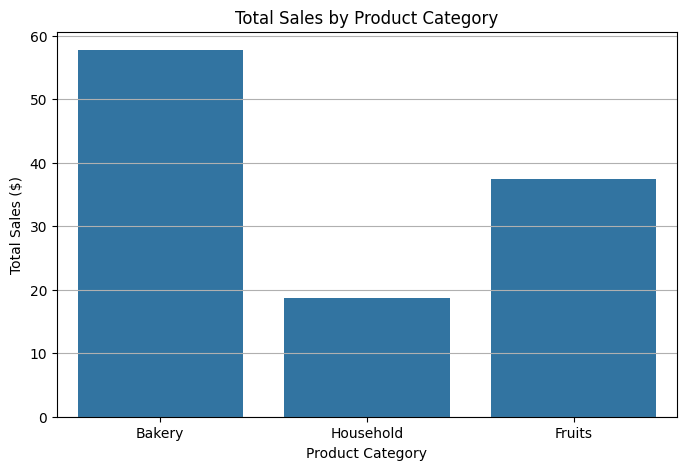

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x='Category', y='Total Sales', data=df, estimator=sum, errorbar=None)
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales ($)')
plt.grid(axis='y')
plt.show()
